# Introduction

**Overview**

The assessment is to apply a Naive Bayes Classifier to predict whether an email can be considered as a spam or not.

**Metric of Success**

The measure of success will lay in the ability of the model to predict whether an email can be considered as a spam or not.

**Dataset**

The dataset used here can be found here: [link text](https://archive.ics.uci.edu/ml/datasets/Spambase)

In [46]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
spam = pd.read_csv("spambase.csv")
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [48]:
# check info
# ---
#
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [49]:
# check for null
# ---
#
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [50]:
# check for duplicates
# ---
#
print(spam.duplicated().any())
print(spam.duplicated().sum())

True
391


In [51]:
# dropping duplicates
# ---
#
spam.drop_duplicates(inplace=True)
print(spam.duplicated().any())
print(spam.duplicated().sum())

False
0


In [52]:
# check for outliers
# ---
#
Q1 = spam.quantile(q=0.25)
Q3 = spam.quantile(q=0.75)

IQR = Q3 - Q1
print(IQR)

word_freq_make                  0.00000
word_freq_address               0.00000
word_freq_all                   0.44000
word_freq_3d                    0.00000
word_freq_our                   0.41000
word_freq_over                  0.00000
word_freq_remove                0.00000
word_freq_internet              0.00000
word_freq_order                 0.00000
word_freq_mail                  0.19000
word_freq_receive               0.00000
word_freq_will                  0.83000
word_freq_people                0.00000
word_freq_report                0.00000
word_freq_addresses             0.00000
word_freq_free                  0.12750
word_freq_business              0.00000
word_freq_email                 0.00000
word_freq_you                   2.72000
word_freq_credit                0.00000
word_freq_your                  1.28000
word_freq_font                  0.00000
word_freq_000                   0.00000
word_freq_money                 0.00000
word_freq_hp                    0.09750


In [53]:
# removing the outliers
# ---
#
spam[~((spam < (Q1 - 1.5 * IQR)) |(spam > (Q3 + 1.5 * IQR))).any(axis=1)]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
16,0.0,0.0,0.0,0.0,0.94,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.88,0.0,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.428,0.0,0.0,4.652,31,107,1
184,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.36,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.53,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,0.0,0.059,0.0,0.118,0.0,0.0,1.307,7,68,1
235,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.29,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1.103,3,32,1
308,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.309,0.0,0.0,1.333,11,56,1
323,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1.266,4,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.79,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1.000,1,1,0
4533,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1.000,1,9,0
4542,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,2.272,4,25,0
4546,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1.250,2,5,0


In [54]:
# statistical description
# ---
#
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [55]:
# shape
# ---
#
spam.shape

(4210, 58)

In [56]:
# size 
# ---
#
spam.size

244180

# Exploratory Data Analysis

Text(0.5, 1.0, 'Spam vs Non_Spam Emails')

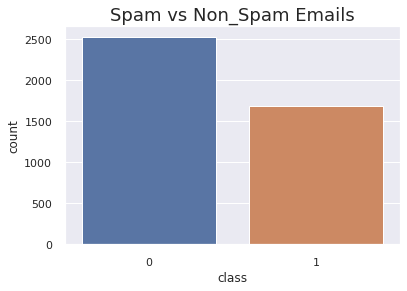

In [57]:
# Plotting the target variable 
# ---
#
ax = sns.countplot(x="class",data=spam)
ax.set_title('Spam vs Non_Spam Emails', fontsize=18)

In [58]:
# correlation
corr = spam.corr()
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0

In [59]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Classifiers


In [60]:
# Performing the Naive Bayes
# ---
#
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
# Getting my features and labels
# ---
#
X = spam.iloc[:,:-1].values
y = spam.iloc[:,-1].values

In [62]:
# Split into train test splits -- 80/20
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)

In [63]:
#  Gaussian Classifier
# ---
# Base without any tuning
#
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [64]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {gnb.score(X_train, y_train)}')
print(f'The test set score accuracy: {gnb.score(X_test, y_test)}')

The train set score accuracy: 0.8355106888361045
The test set score accuracy: 0.8218527315914489


In [65]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

-------- Confusion Matrix --------
[[361 133]
 [ 17 331]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       494
           1       0.71      0.95      0.82       348

    accuracy                           0.82       842
   macro avg       0.83      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



In [66]:
# Split into train test splits -- 70/30
# ---
#
from sklearn.model_selection import train_test_split
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X,y,test_size=0.30, random_state=10)

In [67]:
# Gaussian Classifier
# ---
# Base without any tuning
#
gnb_70 = GaussianNB()
gnb_70.fit(X_train_70, y_train_70)

y_pred_70 = gnb.predict(X_test_70)

In [68]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {gnb_70.score(X_train_70, y_train_70)}')
print(f'The test set score accuracy: {gnb_70.score(X_test_70, y_test_70)}')

The train set score accuracy: 0.831353919239905
The test set score accuracy: 0.8305621536025336


In [69]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test_70, y_pred_70)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test_70, y_pred_70)
print(cl_rep)

-------- Confusion Matrix --------
[[543 193]
 [ 19 508]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       736
           1       0.72      0.96      0.83       527

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



In [70]:
# Split into train test splits -- 60/40
# ---
#
from sklearn.model_selection import train_test_split
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X,y,test_size=0.40, random_state=10)

In [71]:
# Gaussian Classifier
# ---
# Base without any tuning
#
gnb_40 = GaussianNB()
gnb_40.fit(X_train_40, y_train_40)

y_pred_40 = gnb.predict(X_test_40)

In [72]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {gnb_40.score(X_train_40, y_train_40)}')
print(f'The test set score accuracy: {gnb_40.score(X_test_40, y_test_40)}')

The train set score accuracy: 0.831353919239905
The test set score accuracy: 0.8319477434679335


In [73]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test_40, y_pred_40)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test_40, y_pred_40)
print(cl_rep)

-------- Confusion Matrix --------
[[736 258]
 [ 24 666]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       994
           1       0.72      0.97      0.83       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.87      0.83      0.83      1684



In [74]:
# Multinomial Classifier 80/20
# ---
#
multi = MultinomialNB()
multi.fit(X_train, y_train)

y_pred = multi.predict(X_test)

In [75]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {multi.score(X_train, y_train)}')
print(f'The test set score accuracy: {multi.score(X_test, y_test)}')

The train set score accuracy: 0.8046318289786223
The test set score accuracy: 0.7826603325415677


In [76]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

-------- Confusion Matrix --------
[[426  68]
 [115 233]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       494
           1       0.77      0.67      0.72       348

    accuracy                           0.78       842
   macro avg       0.78      0.77      0.77       842
weighted avg       0.78      0.78      0.78       842



# Implementing Optimization for Model Performance

In [77]:
# Split into train test splits -- 80/20
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)

In [78]:
# Feature Scaling
# ---
#
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [79]:
#  Gaussian Classifier
# ---
# Base without any tuning
#
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [80]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {gnb.score(X_train, y_train)}')
print(f'The test set score accuracy: {gnb.score(X_test, y_test)}')

The train set score accuracy: 0.8322446555819477
The test set score accuracy: 0.8194774346793349


In [81]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

-------- Confusion Matrix --------
[[359 135]
 [ 17 331]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       494
           1       0.71      0.95      0.81       348

    accuracy                           0.82       842
   macro avg       0.83      0.84      0.82       842
weighted avg       0.85      0.82      0.82       842

